In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
from google.colab.patches import cv2_imshow

In [ ]:
mainDIR = os.listdir('/content/drive/MyDrive/chest_xray 3c (splited .85 .075 .075)')
print(mainDIR)

['train', 'val', 'test']


In [ ]:
train_folder= '/content/drive/MyDrive/chest_xray 3c (splited .85 .075 .075)/train'
val_folder = '/content/drive/MyDrive/chest_xray 3c (splited .85 .075 .075)/val'
test_folder = '/content/drive/MyDrive/chest_xray 3c (splited .85 .075 .075)/test'

In [ ]:
# train 
train_n = train_folder+'/Normal/'
train_b = train_folder+'/Bacterial/'
train_v = train_folder+'/Viral/'
print(len(os.listdir(train_b)))

1990


In [ ]:
#get the minimum size
h_min = 100000
w_min = 100000
for img in os.listdir(train_v):
   x,y,z = (cv2.imread(train_v+img)).shape
   if x < h_min :
     h_min = x
   if y < w_min :
     w_min = y
print("H-min "+str(h_min))
print("W-min "+str(w_min))

H-min 127
W-min 384


# **close the gap**

In [ ]:
#data augmentation [close the gap] between Normal and pneumnia (we work only on train)
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=10,
    shear_range = 20,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
)
#generate augmented data
normal_train_generator = datagen.flow_from_directory(train_folder,
                                                 target_size = (224,224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical',
                                                 classes=['Viral']  
                                                 )

Found 1254 images belonging to 1 classes.


In [ ]:
generated_x = np.concatenate([normal_train_generator.next()[0] for i in range(normal_train_generator.__len__())])
generated_y = np.concatenate([normal_train_generator.next()[1] for i in range(normal_train_generator.__len__())])

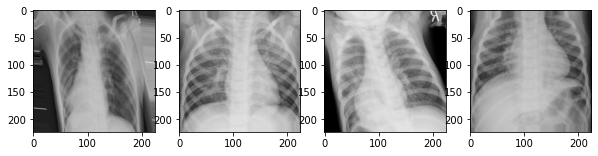

In [ ]:
#plot
fig = plt.figure(figsize=(10, 10))
columns = 4 
rows = 1
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(generated_x[i+300]/255)
plt.show()

In [ ]:
print(generated_x[100].shape)

(224, 224, 3)


In [ ]:
for i in range(len(generated_x)):
# save images
  cv2.imwrite('/content/drive/MyDrive/Augmented Viral/'+str(i)+'.jpeg', generated_x[i])

In [ ]:
print(len(os.listdir('/content/drive/MyDrive/Augmented Viral/')))

1254


In [ ]:
import shutil
# duplicate the dataset 
source_dir = "/content/drive/MyDrive/chest_xray 3 classes (NOISY)(splited .7 .15 .15)"
destination_dir = "/content/drive/MyDrive/chest_xray 3 classes (NOISY + aug viral)(splited .7 .15 .15)"
shutil.copytree(source_dir, destination_dir)

'/content/drive/MyDrive/chest_xray 3 classes (NOISY + aug viral)(splited .7 .15 .15)'

In [ ]:
from prettytable import PrettyTable
# statestics after spliting the dataset and adding noise
# stats train
num_train_normal = len(os.listdir('/content/drive/MyDrive/chest_xray 3 classes (NOISY + aug viral)(splited .7 .15 .15)/train/Normal'))
num_train_bacterial = len(os.listdir('/content/drive/MyDrive/chest_xray 3 classes (NOISY + aug viral)(splited .7 .15 .15)/train/Bacterial'))
num_train_viral = len(os.listdir('/content/drive/MyDrive/chest_xray 3 classes (NOISY + aug viral)(splited .7 .15 .15)/train/Viral'))
TOT_train = num_train_normal + num_train_bacterial + num_train_viral
# stats test
num_test_normal = len(os.listdir('/content/drive/MyDrive/chest_xray 3 classes (NOISY + aug viral)(splited .7 .15 .15)/test/Normal'))
num_test_bacterial = len(os.listdir('/content/drive/MyDrive/chest_xray 3 classes (NOISY + aug viral)(splited .7 .15 .15)/test/Bacterial'))
num_test_viral = len(os.listdir('/content/drive/MyDrive/chest_xray 3 classes (NOISY + aug viral)(splited .7 .15 .15)/test/Viral'))
TOT_test = num_test_viral + num_test_bacterial + num_test_normal
# stats valdidation
num_valid_normal = len(os.listdir('/content/drive/MyDrive/chest_xray 3 classes (NOISY + aug viral)(splited .7 .15 .15)/val/Normal'))
num_valid_bacterial = len(os.listdir('/content/drive/MyDrive/chest_xray 3 classes (NOISY + aug viral)(splited .7 .15 .15)/val/Bacterial'))
num_valid_viral = len(os.listdir('/content/drive/MyDrive/chest_xray 3 classes (NOISY + aug viral)(splited .7 .15 .15)/val/Viral'))
TOT_valid = num_valid_normal + num_valid_bacterial + num_valid_viral

TOT_normal =  num_valid_normal + num_test_normal + num_train_normal
TOT_viral = num_valid_viral + num_test_viral + num_train_viral
TOT_bacterial = num_train_bacterial + num_test_bacterial + num_valid_bacterial
TOT_all = TOT_normal + TOT_viral +TOT_bacterial

#table stat general
t = PrettyTable(['Class','Train','Validation', 'Test','Total'])
t.add_row(['Normal',num_train_normal,num_valid_normal,num_test_normal,TOT_normal])
t.add_row(['viral',num_train_viral,num_valid_viral,num_test_viral,TOT_viral])
t.add_row(['Bacterial',num_train_bacterial,num_valid_bacterial,num_test_bacterial,TOT_bacterial])
t.add_row(['Total',TOT_train,TOT_valid,TOT_test,TOT_all])
print(t)

+-----------+-------+------------+------+-------+
|   Class   | Train | Validation | Test | Total |
+-----------+-------+------------+------+-------+
|   Normal  |  1329 |    237     | 238  |  1804 |
|   viral   |  1254 |    223     | 225  |  1702 |
| Bacterial |  2334 |    417     | 418  |  3169 |
|   Total   |  4917 |    877     | 881  |  6675 |
+-----------+-------+------------+------+-------+


In [ ]:
#Viral
#copy aug images to their respective folder (Train only)
source_folder = "/content/drive/MyDrive/Augmented Viral/"
destination_folder = "/content/drive/MyDrive/chest_xray 3 classes (NOISY + aug viral)(splited .7 .15 .15)/train/Viral/"
cpt = 0
# fetch all files
for file_name in os.listdir(source_folder):
    # construct full file path
    source = source_folder + file_name
    destination = destination_folder + file_name
    # copy only files
    if os.path.isfile(source):
        cpt+=1
        shutil.copy(source, destination)
print(cpt)   

1254


In [ ]:
from prettytable import PrettyTable
# statestics after spliting the dataset and adding noise
# stats train
num_train_normal = len(os.listdir('/content/drive/MyDrive/chest_xray 3 classes (NOISY + aug viral)(splited .7 .15 .15)/train/Normal'))
num_train_bacterial = len(os.listdir('/content/drive/MyDrive/chest_xray 3 classes (NOISY + aug viral)(splited .7 .15 .15)/train/Bacterial'))
num_train_viral = len(os.listdir('/content/drive/MyDrive/chest_xray 3 classes (NOISY + aug viral)(splited .7 .15 .15)/train/Viral'))
TOT_train = num_train_normal + num_train_bacterial + num_train_viral
# stats test
num_test_normal = len(os.listdir('/content/drive/MyDrive/chest_xray 3 classes (NOISY + aug viral)(splited .7 .15 .15)/test/Normal'))
num_test_bacterial = len(os.listdir('/content/drive/MyDrive/chest_xray 3 classes (NOISY + aug viral)(splited .7 .15 .15)/test/Bacterial'))
num_test_viral = len(os.listdir('/content/drive/MyDrive/chest_xray 3 classes (NOISY + aug viral)(splited .7 .15 .15)/test/Viral'))
TOT_test = num_test_viral + num_test_bacterial + num_test_normal
# stats valdidation
num_valid_normal = len(os.listdir('/content/drive/MyDrive/chest_xray 3 classes (NOISY + aug viral)(splited .7 .15 .15)/val/Normal'))
num_valid_bacterial = len(os.listdir('/content/drive/MyDrive/chest_xray 3 classes (NOISY + aug viral)(splited .7 .15 .15)/val/Bacterial'))
num_valid_viral = len(os.listdir('/content/drive/MyDrive/chest_xray 3 classes (NOISY + aug viral)(splited .7 .15 .15)/val/Viral'))
TOT_valid = num_valid_normal + num_valid_bacterial + num_valid_viral

TOT_normal =  num_valid_normal + num_test_normal + num_train_normal
TOT_viral = num_valid_viral + num_test_viral + num_train_viral
TOT_bacterial = num_train_bacterial + num_test_bacterial + num_valid_bacterial
TOT_all = TOT_normal + TOT_viral +TOT_bacterial

#table stat general
t = PrettyTable(['Class','Train','Validation', 'Test','Total'])
t.add_row(['Normal',num_train_normal,num_valid_normal,num_test_normal,TOT_normal])
t.add_row(['viral',num_train_viral,num_valid_viral,num_test_viral,TOT_viral])
t.add_row(['Bacterial',num_train_bacterial,num_valid_bacterial,num_test_bacterial,TOT_bacterial])
t.add_row(['Total',TOT_train,TOT_valid,TOT_test,TOT_all])
print(t)

+-----------+-------+------------+------+-------+
|   Class   | Train | Validation | Test | Total |
+-----------+-------+------------+------+-------+
|   Normal  |  1329 |    237     | 238  |  1804 |
|   viral   |  2508 |    223     | 225  |  2956 |
| Bacterial |  2334 |    417     | 418  |  3169 |
|   Total   |  6171 |    877     | 881  |  7929 |
+-----------+-------+------------+------+-------+
